In [1]:
# Imports
%matplotlib nbagg
import numpy as np
import matplotlib.pyplot as plt
import tables
import sys
import healpy as hp
import pandas as pd

### Multiprocessed across particles (single energy, single direction)

$ python scripts/prism.py -n 100000 -E 60 -out test-particles -mp --track_secondaries

Simulation time = 4.08 s (on 14 core iMacPro)

If not multiprocessed: 7.08 s

In [67]:
# Read in data 
h5file = tables.open_file("../test-particles.h5")

rawdata = []
for k,v in h5file.root.raw._v_children.items():
    rawdata.append(pd.DataFrame(h5file.root.raw._f_get_child(k)[:]))

h5file.close()

<IPython.core.display.Javascript object>


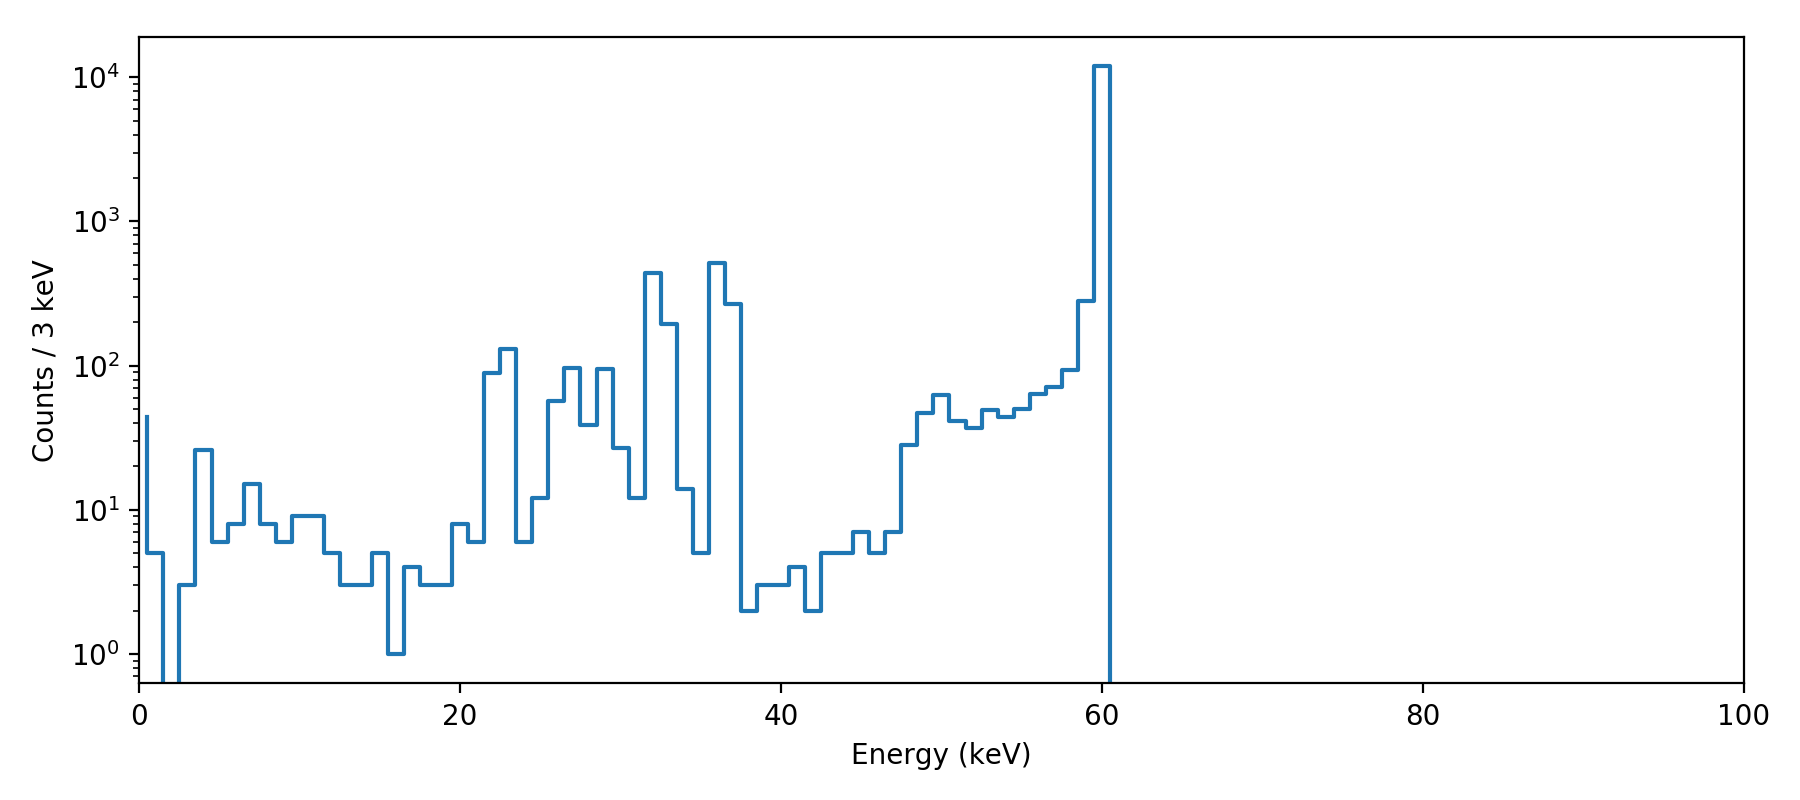

In [68]:
# Sum single crystal events, get energies
dg = []
for dat in rawdata:
    dg.append(dat.groupby(['eventID', 'detID'])['E'].sum().reset_index())
dg = pd.concat(dg)

# Plot energy spectra
plt.figure(figsize=(9,4))
spec, bins = np.histogram(dg['E'].values, range=(0,100), bins=100)
bins = (bins[1:] + bins[:-1])/2.
plt.plot(bins, spec, drawstyle='steps')
plt.yscale('log')
plt.xlim(0,100)
plt.xlabel("Energy (keV)")
plt.ylabel("Counts / 3 keV")
# plt.legend()
plt.tight_layout()
plt.show()

In [76]:
dg = []
for dat in rawdata:
    dg.append(dat.groupby(['eventID', 'detID'])['E'].sum().reset_index())
dg = pd.concat(dg)

In [77]:
r = dg[dg['E'].values == 60].groupby(['detID'])['E'].count()

In [79]:
resp = np.zeros(192)
resp[r.keys().values] = r.values

<IPython.core.display.Javascript object>


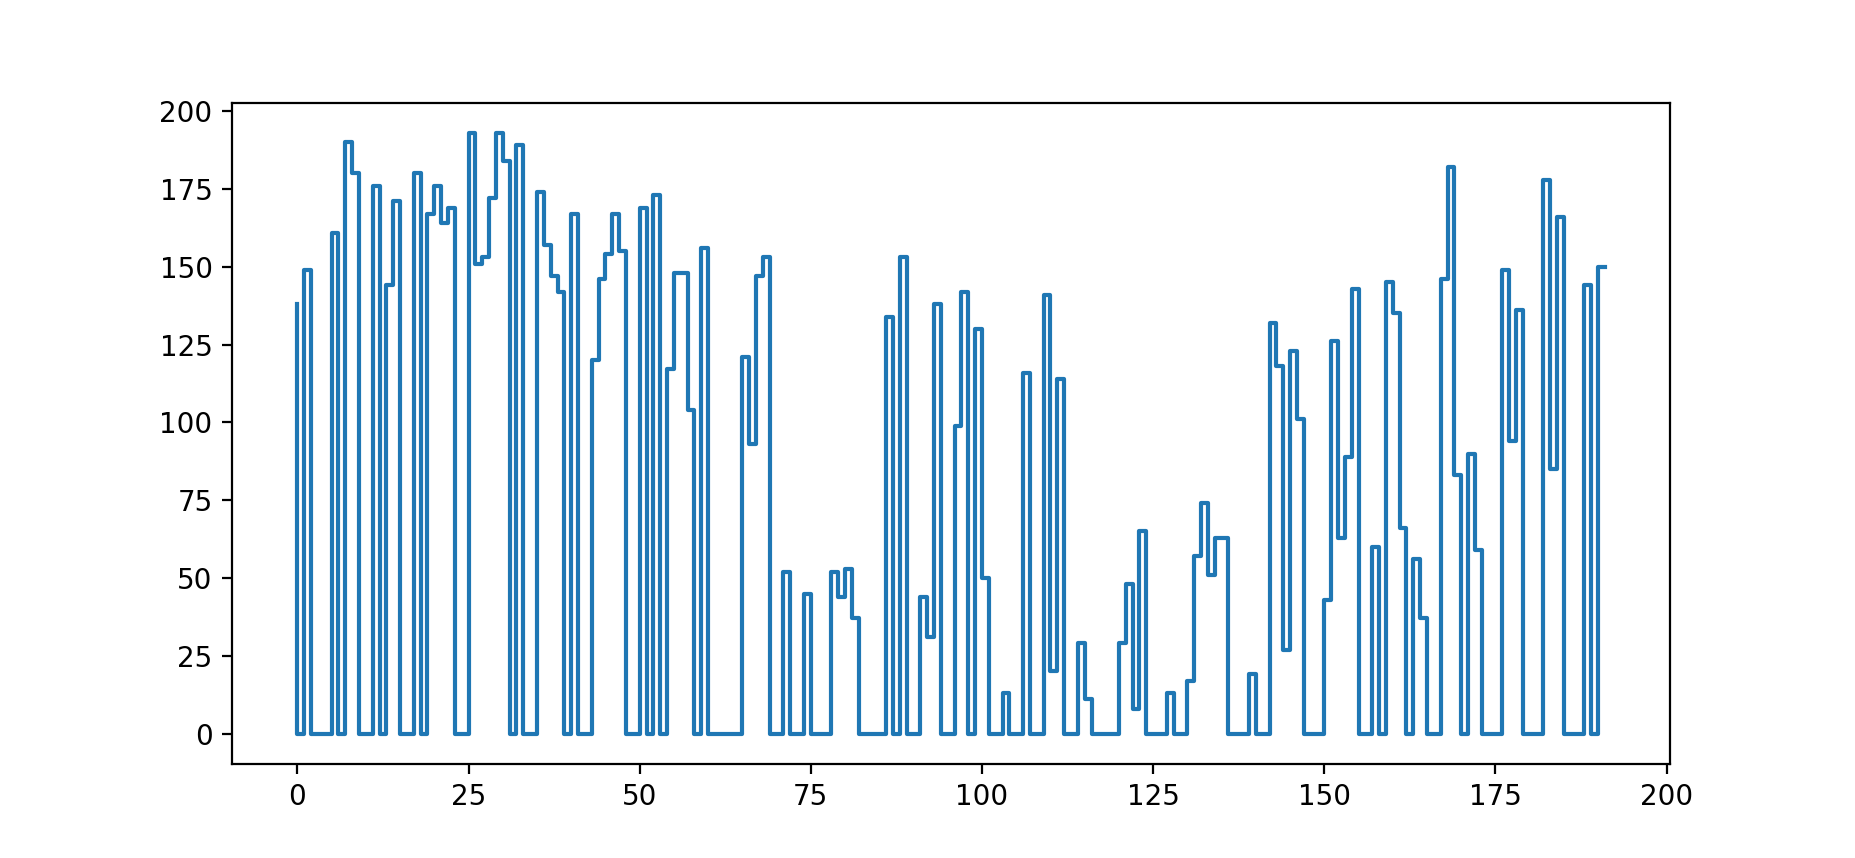

In [82]:
plt.figure()
plt.plot(resp, drawstyle='steps')
plt.show()

### Multiprocessed across healpix (single energy)

$ python scripts/prism.py -n 10000 -healpix 8 -1 -E 60 -out test-healpix -mp --track_secondaries

Simulation time = 41.16 s (on 14 core iMacPro)

If not multiprocessed: ~30 min

In [61]:
# Read in data 
h5file = tables.open_file("../test-healpix.h5")

rawdata = []
for i in range(768):
    rawdata.append(pd.DataFrame(h5file.root.raw._f_get_child('data_%i'%i)[:]))

h5file.close()

In [62]:
# Pull out full energy responses
resp = np.zeros((192,768))

for i, dat in enumerate(rawdata):
    d = dat.groupby(['eventID', 'detID'])['E'].sum().reset_index()
    r = d[d['E'].values == 60].groupby(['detID'])['E'].count()
    resp[:,i][r.keys().values] = r.values

<IPython.core.display.Javascript object>


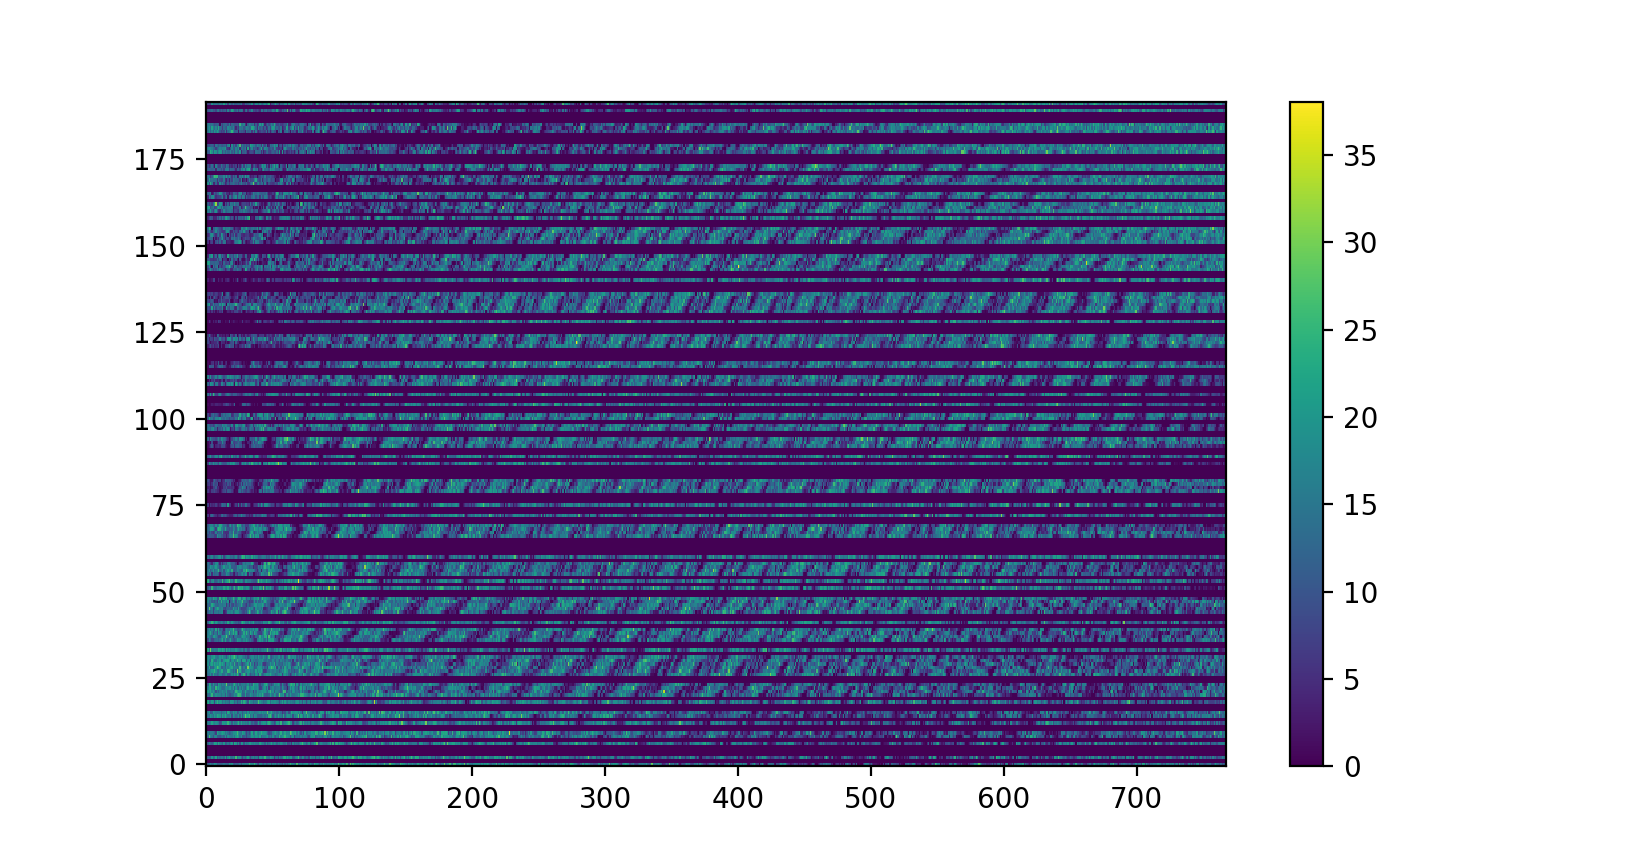

In [63]:
# Plot response
plt.figure()
plt.imshow(resp, interpolation='nearest', aspect='auto', origin='lower')
plt.colorbar()
plt.show()

### Multiprocessed across energy (single direction)

$ python scripts/prism.py -n 100000 -E 60 186 356 662 -out test-energy -mp --track_secondaries

Simulation time = 9.03 s (on 14 core iMacPro)

If not multiprocessed: 26.66 s

In [95]:
# Read in data 
h5file = tables.open_file("../test-energy.h5")

n = len(h5file.root.raw._v_children.items())

rawdata = []
for i in range(n):
    rawdata.append(pd.DataFrame(h5file.root.raw._f_get_child('data_%i'%i)[:]))

h5file.close()

<IPython.core.display.Javascript object>


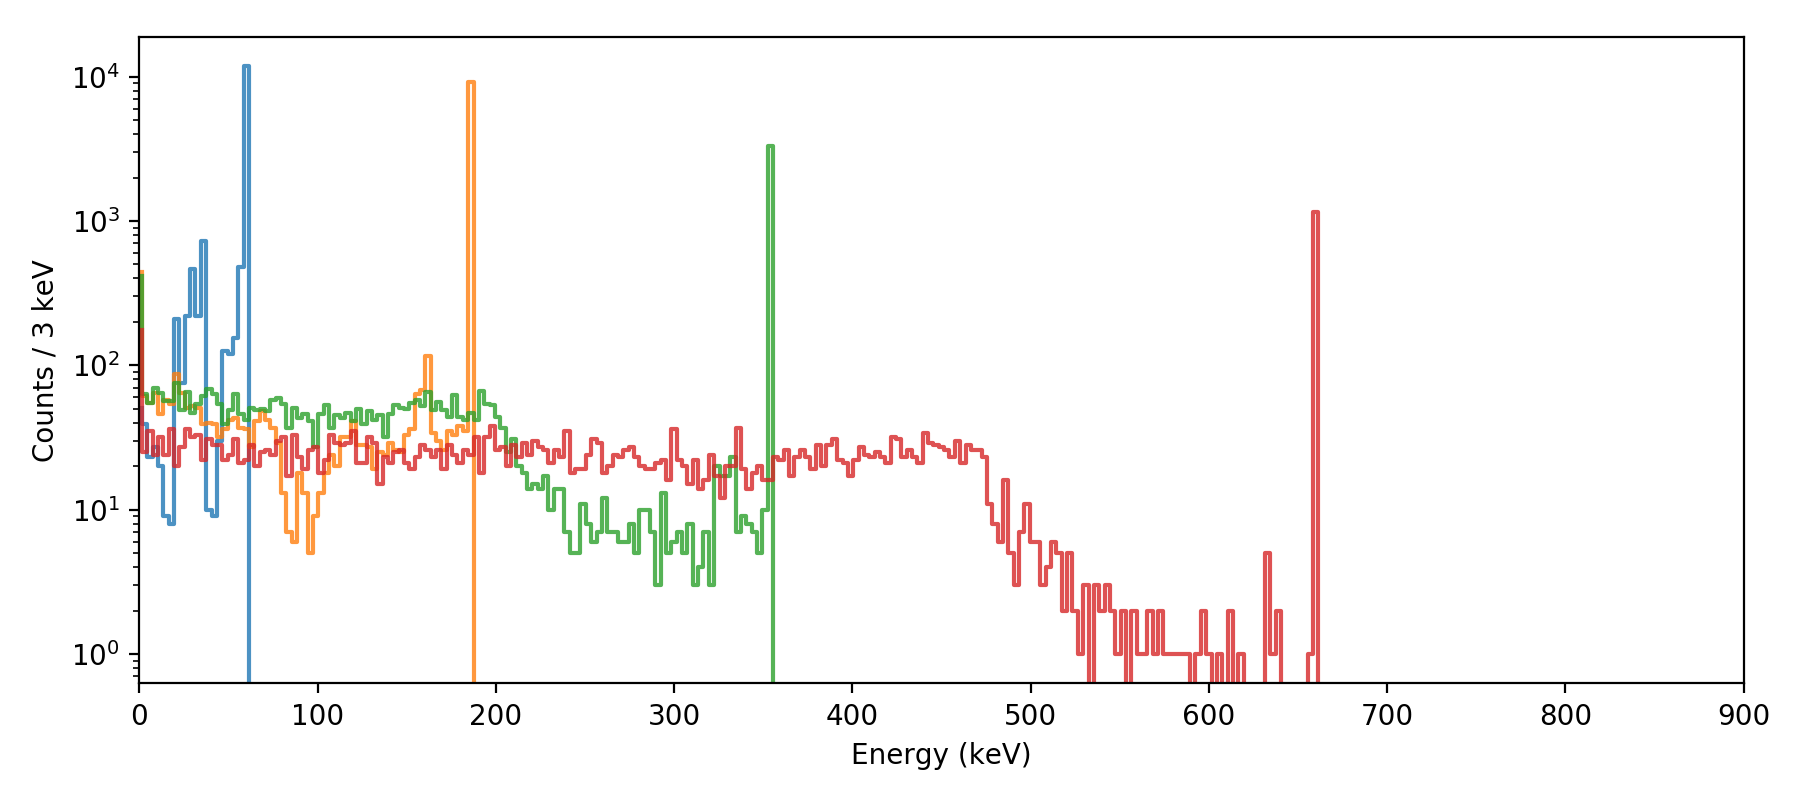

In [97]:
# Sum single crystal events, get energies

dg = []
for i, dat in enumerate(rawdata):
    dg.append(dat.groupby(['eventID', 'detID'])['E'].sum().reset_index())

# Plot energy spectra
plt.figure(figsize=(9,4))

for d in dg:
    spec, bins = np.histogram(d['E'].values, range=(0,900), bins=300)
    bins = (bins[1:] + bins[:-1])/2.
    plt.plot(bins, spec, drawstyle='steps', alpha=0.8)

plt.yscale('log')
plt.xlim(0,900)
plt.xlabel("Energy (keV)")
plt.ylabel("Counts / 3 keV")
# plt.legend()
plt.tight_layout()
plt.show()